In [1]:
import torch

In [2]:
# Create a 2x2 matrix with gradient-accumulation capabilitis
X = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
print(X)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [3]:
# Do an operation
Y = X - 2
Y

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)

In [4]:
print(Y.grad_fn)

In [5]:
Y.grad_fn.next_functions[0][0].variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [6]:
# do more operation on Y
Z = Y * Y * 3
a = Z.mean()
print(Z)
print(a)

tensor([[ 3.,  0.],
        [ 3., 12.]], grad_fn=<MulBackward0>)
tensor(4.5000, grad_fn=<MeanBackward0>)


In [7]:
from torchviz import make_dot

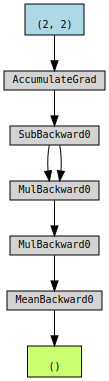

In [8]:
make_dot(a)

### Gradients

In [9]:
# Backprop
a.backward()

Print $\frac{da}{dx}$

In [10]:
print(X.grad)

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])


In [11]:
# Dynamic graphs!
x = torch.randn(3, requires_grad=True)

y = x * 2
i = 0
while y.data.norm() < 1000:
    y = y * 2
    i += 1
print(y)

tensor([1578.3356,  929.2512,  658.4047], grad_fn=<MulBackward0>)


In [12]:
# If we dont run backward computation on a scalar, we need to speficify the grad_output
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)
print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [13]:
print(i)

10


### Inference

In [14]:
# This variable decides the tensor's range below
n = 3

In [18]:
x = torch.arange(1., n+1, requires_grad=True)
w = torch.ones(n, requires_grad=True)
z = w @ x
print(x)
print(w)
print(z)

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 1., 1.], requires_grad=True)
tensor(6., grad_fn=<DotBackward0>)


In [19]:
# Compute backprop
z.backward()

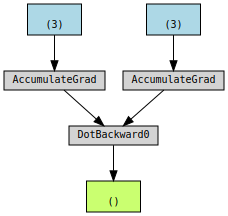

In [20]:
make_dot(z)

In [26]:
print(x.grad, w.grad, sep='\n')

tensor([1., 1., 1.])
tensor([1., 2., 3.])


In [28]:
# Only w that allows gradient accumulation
x = torch.arange(1., n+1)
w = torch.ones(n, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

None
tensor([1., 2., 3.])


In [31]:
x = torch.arange(1., n+1)
w = torch.ones(n, requires_grad=True)

# Ensure there's no gradient accumlation. Useful for the inference
with torch.no_grad():
    z = w @ x
    
try:
    z.backward()
except RuntimeError as e:
    print('Runtime Error!!!')
    print(e)

Runtime Error!!!
element 0 of tensors does not require grad and does not have a grad_fn
